X_train.shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
______________________________________________

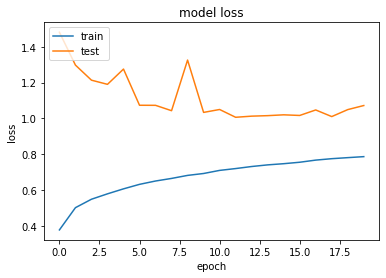

In [2]:
from keras.datasets import cifar10

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

# had to add it because of secure socket layer(SSL)
# to load the dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# CIFAR_10 is set of 60K images 32X32 pixels on 3 channels
IMG_CHANNELS = 3

IMG_ROWS = 32

IMG_COLS = 32

#constant
BATCH_SIZE = 128

NB_EPOCH = 20

NB_CLASSES = 10

VERBOSE = 1

VALIDATION_SPLIT = 0.2

OPTIM = RMSprop()

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('X_train.shape: ', X_train.shape)

print(X_train.shape[0], 'train samples')

print(X_test.shape[0], 'test samples')

# convert to categorical
y_train = np_utils.to_categorical(y_train, NB_CLASSES)

y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

X_train /= 255

X_test /= 255

# network
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

#  network with 512 units and ReLu activation
model.add(Flatten())

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(NB_CLASSES))

model.add(Activation('softmax'))

model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

print("Test score:", score[0])

print("Test accuracy:", score[1])

#save model
model_json = model.to_json()

open('cifar10_architecture.json', 'w').write(model_json)

#save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

X_train.shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_12 (Activation)   (None, 16, 16, 64)        0         
______________________________________________

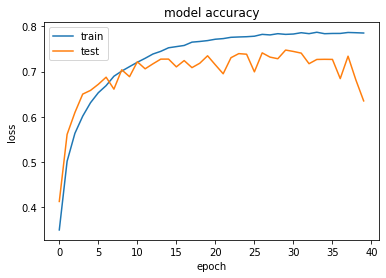

In [63]:
from keras.datasets import cifar10

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

# had to add it because of secure socket layer(SSL)
# to load the dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# CIFAR_10 is set of 60K images 32X32 pixels on 3 channels
IMG_CHANNELS = 3

IMG_ROWS = 32

IMG_COLS = 32

#constant
BATCH_SIZE = 128


NB_EPOCH = 40

NB_CLASSES = 10

VERBOSE = 1

VALIDATION_SPLIT = 0.2


OPTIM = RMSprop()

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('X_train.shape: ', X_train.shape)


print(X_train.shape[0], 'train samples')

print(X_test.shape[0], 'test samples')

# convert to categorical
y_train = np_utils.to_categorical(y_train, NB_CLASSES)


y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')

X_test = X_test.astype('float32')


X_train /= 255


X_test /= 255


#network
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(NB_CLASSES))

model.add(Activation('softmax'))

model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

print("Test score: ", score[0])

print("Test accuracy: ", score[1])

# save model
model_json = model.to_json()

open('cifar10_architecture.json', 'w').write(model_json)

# save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [98]:
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import scipy.misc

# CIFAR_10 is a set of 60k images 32x32 on 3 channels
IMG_CHANNEL = 3

IMG_ROWS = 32

IMG_COLS = 32

NUM_TO_AUGMENT = 5

#constants
BATCH_SIZE = 128

NB_EPOCH = 40

NB_CLASSES = 10

VERBOSE = 1

VALIDATION_SPLIT = 0.2

OPTIM = RMSprop()

# load dataset
(X_train, y_trian), (X_test, y_test) = cifar10.load_data()

print('X_train shapee: ', X_train.shape)

print(X_train.shape[0], 'train samples')

print(X_test.shape[0], 'test samples')

#Augment
print("Augmenting training set images. . .")

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

xtas, ytas = [], []

for i in range(X_train.shape[0]):
    num_aug = 0
    x = X_train[i]
    x = x.reshape((1,) + x.shape)

for x_aug in datagen.flow(x, batch_size = 1, save_to_dir='preview', save_prefix='cifar', save_format='jpeg'):
    if (num_aug >= NUM_TO_AUGMENT):
        num_aug = 0
        break
    else:    
        num_aug += 1

# convert to categorical
y_train = np_utils.to_categorical(y_train, NB_CLASSES)

y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#float and normalization
X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

X_train /= 255

X_test /= 255

# network
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))

model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(NB_CLASSES))

model.add(Activation('softmax'))

model.summary()

# fit the dataget
datagen.fit(X_train)

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

print("Test score: ", score[0])

print("Test accuracy: ", score[1])

#save model
model_json = model.to_json()

open('cifar10_architecture_model.json', 'w').write(model_json)

# save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# summarize history for accuracy
plt.plot(history.history['loss'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('loss')

plt.xlabel('poch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

X_train shapee:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Augmenting training set images. . .


FileNotFoundError: [Errno 2] No such file or directory: 'preview\\cifar_0_3812.jpeg'

This algorithm that was utilized to study the images of human and non human just produce a test accuracy of: 63.17
 percent. This accuracy demonstrated that this project isn't accurat enough to correctly identify humans. As a result this can have major concerns cause it could create bias in techologies such as facial recognition. Facial recognition is a highly debatable topic on bias and  where it stands with reguards to ethical grounds. I found that African American males have a higher probability of being a victim of discriminatory practices from law enforcement as a result of the usage of facial recognition thats used to make the pedictions. One problem with the data is that black americans are the majority of the data in the mugshot database which has lead in the past to black americans being wrongfully profiled. Several techniques have been implemented to address these concerns. Algorithms are training with more diverse data to include every type of race. Cameras are set so they dont capture only darker skin tones resulting in lower quality imges of african americans. Ethical auditing is being implemented to hold organizations responsible maintain methodological biases.

Najibi, A (October 2020). Racial Discrimination in Face Rcognition Technology
https://sitn.hms.harvard.edu/flash/2020/racial-discrimination-in-face-recognition-techology/



